## Pandas读取Excel数据绘制直方图

***直方图(Histogram)：***  
又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况

### 1. 处理数据

In [6]:
import re

In [7]:
datas = []
with open("./datas/boston-house-prices/housing.csv") as fin:
    for line in fin:
        fields = re.split(r"\s+", line)
        datas.append([x for x in fields if len(x)>0])

len(datas[0])

14

In [8]:
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", 
    "LSTAT", "MEDV"
]

In [9]:
len(columns)

14

In [10]:
with open("./datas/boston-house-prices/housing_clean.csv", "w") as fout:
    fout.write(",".join(columns)+"\n")
    for data in datas:
        fout.write(",".join(data)+"\n")

## 2. 读取数据

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("./datas/boston-house-prices/housing_clean.csv")

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [15]:
df["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### 1. 使用matplotlib画直方图

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
arr = np.random.randn(100000)

In [4]:
arr

array([ 2.23274322, -1.62676135,  0.21707777, ..., -0.63131163,
        1.22691428, -1.83830752])

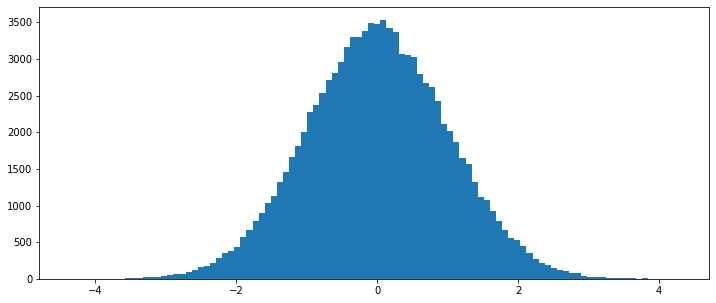

In [5]:
plt.figure(figsize=(12, 5))
plt.hist(arr, bins=100)
plt.show()

### 3. 使用pyecharts画直方图

In [16]:
from pyecharts import options as opts
from pyecharts.charts import Bar

In [17]:
hist,bin_edges =  np.histogram(df["MEDV"], bins=50)

In [18]:
hist

array([ 3,  1,  7,  7,  3,  6,  8, 10,  8, 23, 15, 19, 14, 16, 18, 28, 36,
       29, 33, 28, 37, 21, 15,  4,  7, 11,  9,  9,  5,  7,  7,  8,  2,  8,
        5,  4,  2,  1,  1,  0,  2,  2,  2,  2,  2,  1,  1,  0,  3, 16],
      dtype=int64)

In [19]:
len(hist)

50

In [20]:
bin_edges

array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
       14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
       24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
       34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
       44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ])

In [21]:
len(bin_edges)

51

In [22]:
bar = (
    Bar()
    .add_xaxis([str(x) for x in bin_edges[:-1]])
    .add_yaxis("价格分布", [float(x) for x in hist], category_gap=0)
    .set_global_opts(title_opts=opts.TitleOpts(title="波斯顿房价-价格分布-直方图"))
)
bar.render_notebook()